In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot  as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error

In [3]:
def read_df(link_url):
    df = pd.read_parquet(link_url)
    return df

In [4]:
yellow_jan = read_df('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')

#### Q1. Downloading the data

In [10]:

print('number of columns in df:',len(yellow_jan.columns))

number of columns in df: 19


#### Q2. Computing duration

In [25]:
def extract_time_from_column(df, datetime_column, new_time_column):
    df[new_time_column] = df[datetime_column].apply(lambda x: x.time())
    return df

In [27]:
yellow_jan = extract_time_from_column(yellow_jan, 'tpep_dropoff_datetime', 'tpep_dropoff_time')
yellow_jan = extract_time_from_column(yellow_jan, 'tpep_pickup_datetime', 'tpep_pickup_time')
yellow_jan['tpep_dropoff_time'].head()

0    00:34:34
1    00:35:30
2    00:35:30
3    01:01:38
4    00:25:46
Name: tpep_dropoff_time, dtype: object

In [29]:
yellow_jan.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,tpep_pickup_time,tpep_dropoff_time
0,1,2023-02-01 00:32:53,2023-02-01 00:34:34,2.0,0.30,1.0,N,142,163,2,...,3.50,0.5,0.0,0.0,1.0,9.40,2.5,0.00,00:32:53,00:34:34
1,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,71,71,4,...,-1.00,-0.5,0.0,0.0,-1.0,-5.50,0.0,0.00,00:35:16,00:35:30
2,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,71,71,4,...,1.00,0.5,0.0,0.0,1.0,5.50,0.0,0.00,00:35:16,00:35:30
3,1,2023-02-01 00:29:33,2023-02-01 01:01:38,0.0,18.80,1.0,N,132,26,1,...,2.25,0.5,0.0,0.0,1.0,74.65,0.0,1.25,00:29:33,01:01:38
4,2,2023-02-01 00:12:28,2023-02-01 00:25:46,1.0,3.22,1.0,N,161,145,1,...,1.00,0.5,3.3,0.0,1.0,25.30,2.5,0.00,00:12:28,00:25:46


In [5]:
yellow_jan['duration'] = (yellow_jan['tpep_dropoff_datetime'] - yellow_jan['tpep_pickup_datetime']).apply(lambda x: x.total_seconds() / 60)
yellow_jan['duration'].head()

0     1.683333
1     0.233333
2     0.233333
3    32.083333
4    13.300000
Name: duration, dtype: float64

In [36]:
print('the standard deviation of the trips duration in January:',yellow_jan.duration.std())

the standard deviation of the trips duration in January: 42.84210176105113


##### Q3. Dropping outliers

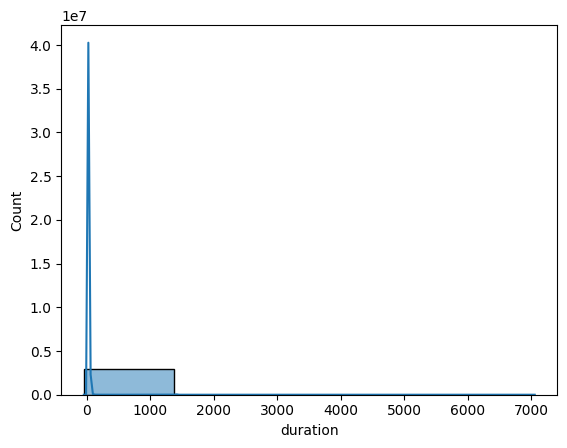

In [52]:
sns.histplot(yellow_jan['duration'], kde=True, bins=5)
plt.show()

In [6]:
df = yellow_jan[(yellow_jan.duration >= 1) & (yellow_jan.duration <= 60)]

In [9]:
outliers_prst = (len(df['duration'])/len(yellow_jan['duration']))
outliers_prst

0.9800944077722545